<p>
<font size='5' face='Georgia, Arial'>IIC2115 - Programación como herramienta para la ingeniería</font><br>
</p>

## Manjeo de redes
En Python, muchas librerías nos simplifican el trabajo y se especializan en ciertas temáticas. Ya vimos la librerías de Pandas, Sklearn y Geopandas que nos permitieron trabajar con datos, estimar modelos de aprendizaje de máquina y trabajar con SIG. En esta segunda parte del capítulo, trabajaremos con la librería NetworkX. Según la propia documentación de la librería, NetworkX es una librería para la creación, manipulación y estudio de estructuras, dinamismos y funciones de redes complejas ([Documentación de NetwokX](https://networkx.org))

### Instalación

La instalación de la librería networkX no presenta mayores inconvenientes y es fácil de realizar mediante `pip`. Basta que lo instalen como acostumbran en sus computadores: `pip install netowrkx`. En Colab la librería se encuentra preinstalada.

### Creando nuestras propias redes ([referencia](https://networkx.org/documentation/stable/tutorial.html))

Una de las funciones de networkX es que nos permite crear nuestras propias redes. A conitnuación veremos el proceso de creación de una red en networkX.

In [5]:
# Primero importamos la librería de networkX
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

# Creamos una red (objeto de nx) vacía
G = nx.Graph()

Por definición un **`Graph`** es una colección de nodos (vertices) relacionados con pares de nodos (arcos). Ahora procederemos a agregar nodos y arcos a nuestra red.
#### a) Nodos

El `graph` puede ser poblado de varias formas. La librería incluye generadores de redes o funciones para leer redes desde varios formatos. Por ahora, solo incluíremos un nodo de forma sencilla.

In [6]:
# Agregamos un solo nodo
G.add_node(1)

# Agregamos una lista de nodos
G.add_nodes_from([2, 3])

# Agregamos una lista de tuplas de nodos con atributos -> (nodo, dict de atributos)
G.add_nodes_from([(4, {'nombre': 'Santiago'}),
                  (5, {'nombre': 'Valparaíso'})])

#### b) Arcos
Para agregar los arcos, es necesario ingresar los nodos previamente. Para ingresar los arcos, debemos indicar que nodos buscamos conectar. Por ejemplo:

In [7]:
# Agregamos un arco entre el nodo 1 y el nodo 2
G.add_edge(1, 2)

# Agregamos un arco entre el nodo 2 y 3 alamcenado en una tupla
e = (2, 3)
G.add_edge(*e) # <-- Asi desempaquetamos una tupla como inputs

# Agregamos un arco 1->2 y 1->3 desde una lista
G.add_edges_from([(2, 4), (3, 5), (3,1)])

### Visualizando redes 

Para poder visualizar las redes de NetworkX, podemos hacer uso del método `draw()`. Este genera una visualización de la red y si no se han indicado coordenadas optimiza la localización de nodos.

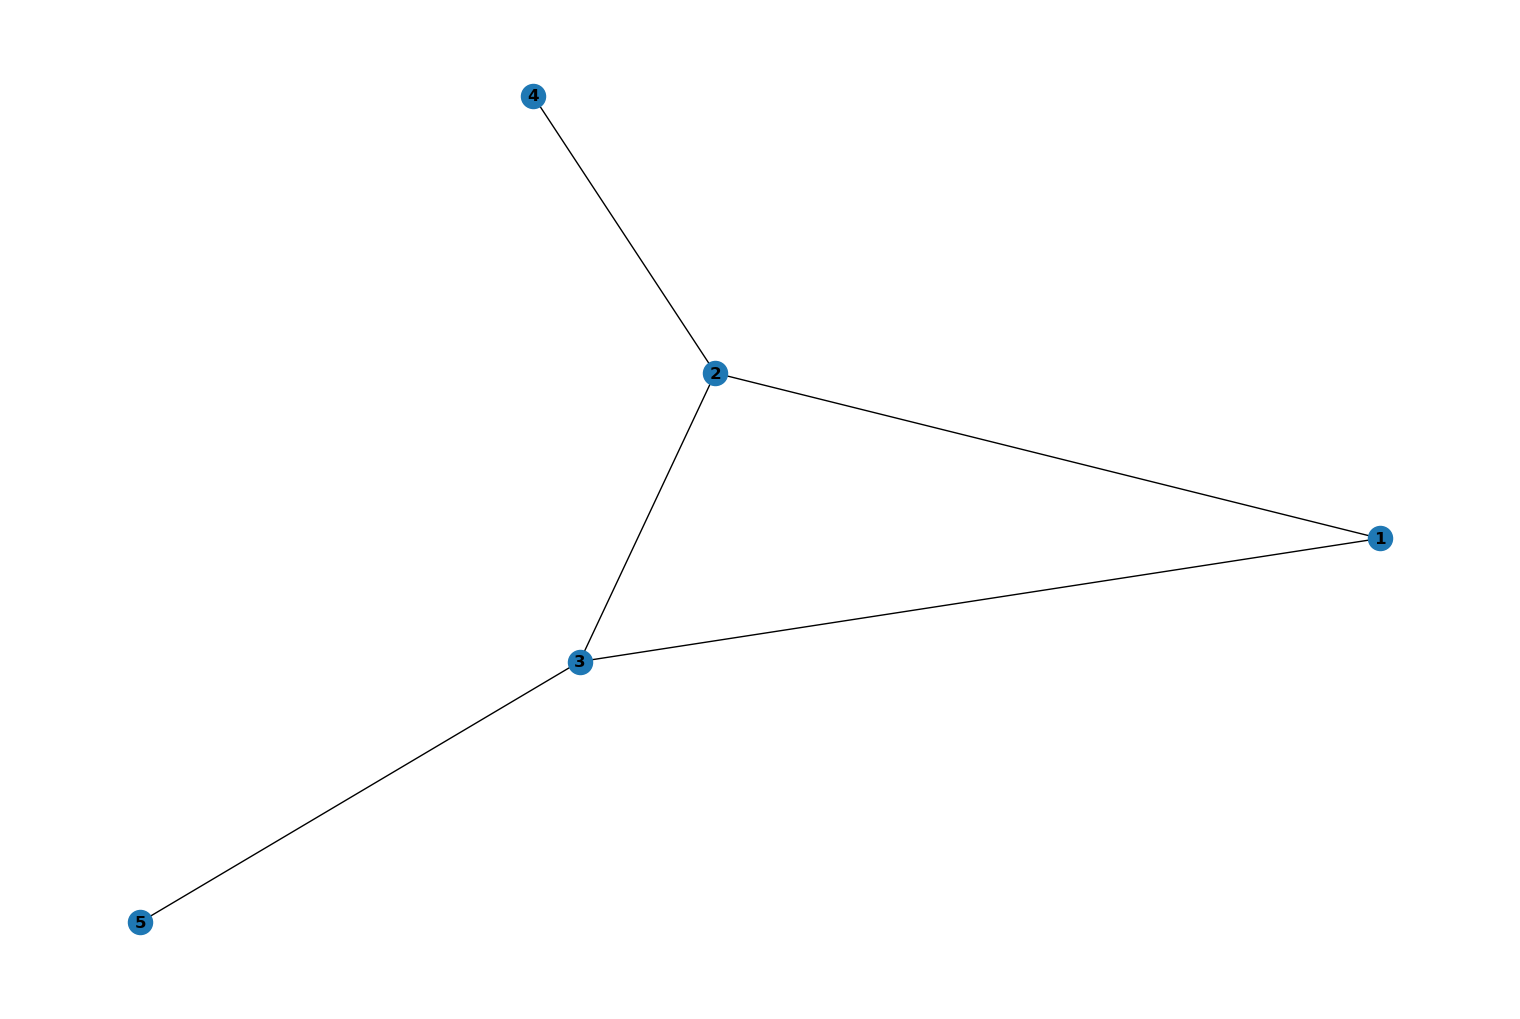

In [8]:
nx.draw(G, with_labels=True, font_weight='bold')

### Tipos de grafos
Los grafos son conjuntos de nodos y arcos que poseen cierta estructura, en NetworkX existen 4 tipos de grafos basados en 2 categorías:
1. Grafo dirigido o no dirigido: Los arcos en NetworkX pueden tener dirección (grafo dirigido) o no tenerla (grafo no dirigido), en el caso del grafo dirigido, el arco AB es distinto al arco BA, mientras que en el caso no dirigido son exactamente lo mismo, por lo que si existe el arco AB también existe el arco BA.
2. Normal o multi grafo: Los multigrafos en NetworkX permiten tener más de un arco entre un par de nodos, en cambio los grafos normales simplemente tienen un arco para cada par de nodos.

De estas definiciones se obtienen los 4 grafos existentes en NetworkX:
- Graph
- DiGraph
- MultiGraph
- MultiDiGraph

### Creación de grafo a partir de fuentes de datos

Ahora que ya sabemos lo básico de la estructura de una red o grafo, es posible crear un grafo en NetworkX mediante una fuente de datos externa. En este ejemplo, utilizaremos un *string*, el que por ejemplo, puede venir almacenado dentro de un archivo de texto. Este *string* tiene forma de tablero formado por casillas **"X"** y **"O"**. Cada casilla **"O"** corresponde a nodo y tiene por vecinos a los nodos que sean vecinos en el tablero. Por ejemplo:

```python
XOXOO
OOXOX
XOOOO
```

Primero definimos nuestra propia estructura de datos, como lo trabajamos en el capítulo 2:

In [9]:
class Nodo:
    _id = 0
    
    # Constructor de un Nodo mediante un ID, su posicion dentro del tablero y una lista de los nodos vecinos
    def __init__(self, posicion):
        self._id = Nodo._id 
        self.posicion = posicion # Tupla (x,y)
        self.vecinos = []
        Nodo._id += 1
        
    # Metodo que agrega un vecino a la lista de vecinos
    def add_vecino(self, nodo):
        self.vecinos.append(nodo)
        
    def __str__(self):
        return "Nodo: " + str(self.posicion) + " Vecinos: " + str([nodo.posicion for nodo in self.vecinos])
    
    def __repr__(self):
        return str(self._id)
    

Luego creamos un método que es capaz de convertir nuestra red codificada como tablero en una red usando nuestra estructura de datos

In [10]:
def crear_grafo(matriz):
    grafo = dict()
    fila = len(matriz)
    columna = len(matriz[0])
    
    for i in range(fila):
        for j in range(columna):
            if matriz[i][j] == "O":
                if (i,j) not in grafo.keys():
                    nodo = Nodo((i,j))
                    grafo.update({(i,j):nodo}) # grafo[(i,j)] = nodo
                
                for f,c in [(-1,0),(0,-1),(1, 0), (0, 1)]: #Accede arriba, izquierda, abajo, derecha
                    if i + f >= 0 and j + c >= 0 and i + f < fila and j + c < columna: # si no estoy en un borde
                        if matriz[i+f][j+c] == "O":
                            if (i+f,j+c) not in grafo.keys():
                                vecino = Nodo((i+f,j+c))
                                grafo.update({(i+f,j+c):vecino}) # grafo[(i+f,j+c)] = vecino
                            else:
                                vecino = grafo[(i+f,j+c)]
                            grafo[(i,j)].add_vecino(vecino)
    return grafo

In [11]:
tablero = """XOXOO
OOXOX
XOOOO
"""
filas_tablero = tablero.split()
grafo = crear_grafo(filas_tablero)

for nodo in grafo.values():
    print(nodo)

Nodo: (0, 1) Vecinos: [(1, 1)]
Nodo: (1, 1) Vecinos: [(0, 1), (1, 0), (2, 1)]
Nodo: (0, 3) Vecinos: [(1, 3), (0, 4)]
Nodo: (1, 3) Vecinos: [(0, 3), (2, 3)]
Nodo: (0, 4) Vecinos: [(0, 3)]
Nodo: (1, 0) Vecinos: [(1, 1)]
Nodo: (2, 1) Vecinos: [(1, 1), (2, 2)]
Nodo: (2, 3) Vecinos: [(1, 3), (2, 2), (2, 4)]
Nodo: (2, 2) Vecinos: [(2, 1), (2, 3)]
Nodo: (2, 4) Vecinos: [(2, 3)]


Es posible crear una visualización de nuestra red. Pero qué pasa si ahora utilizamos NetworkX. Crearemos un método que define una red de NetworkX, y luego la graficaremos.

In [12]:
def crear_grafo_nx(grafo):
    
    # Esta función crea un grafo no dirigido de networkx utilizando la estructura de datos creada anteriormente
    G = nx.Graph()
    #posiciones = dict()
    arcos = set()
    
    for nodo in grafo.values():
        G.add_node(nodo._id,pos = nodo.posicion)
        #posiciones[nodo._id] = nodo.posicion
        for vecino in nodo.vecinos:
            if (nodo._id, vecino._id) not in arcos and (vecino._id, nodo._id) not in arcos: #se crea solo si no existe
                G.add_edge(nodo._id, vecino._id) #cola, cabeza
    return G

In [13]:
def graficar_red(G, tamaño_fuente, tamaño_nodo):
    posiciones = nx.get_node_attributes(G,'pos')
    nx.draw(G, pos=posiciones, with_labels=True, font_size=tamaño_fuente, node_size=tamaño_nodo, node_color="lightblue")
    plt.show()

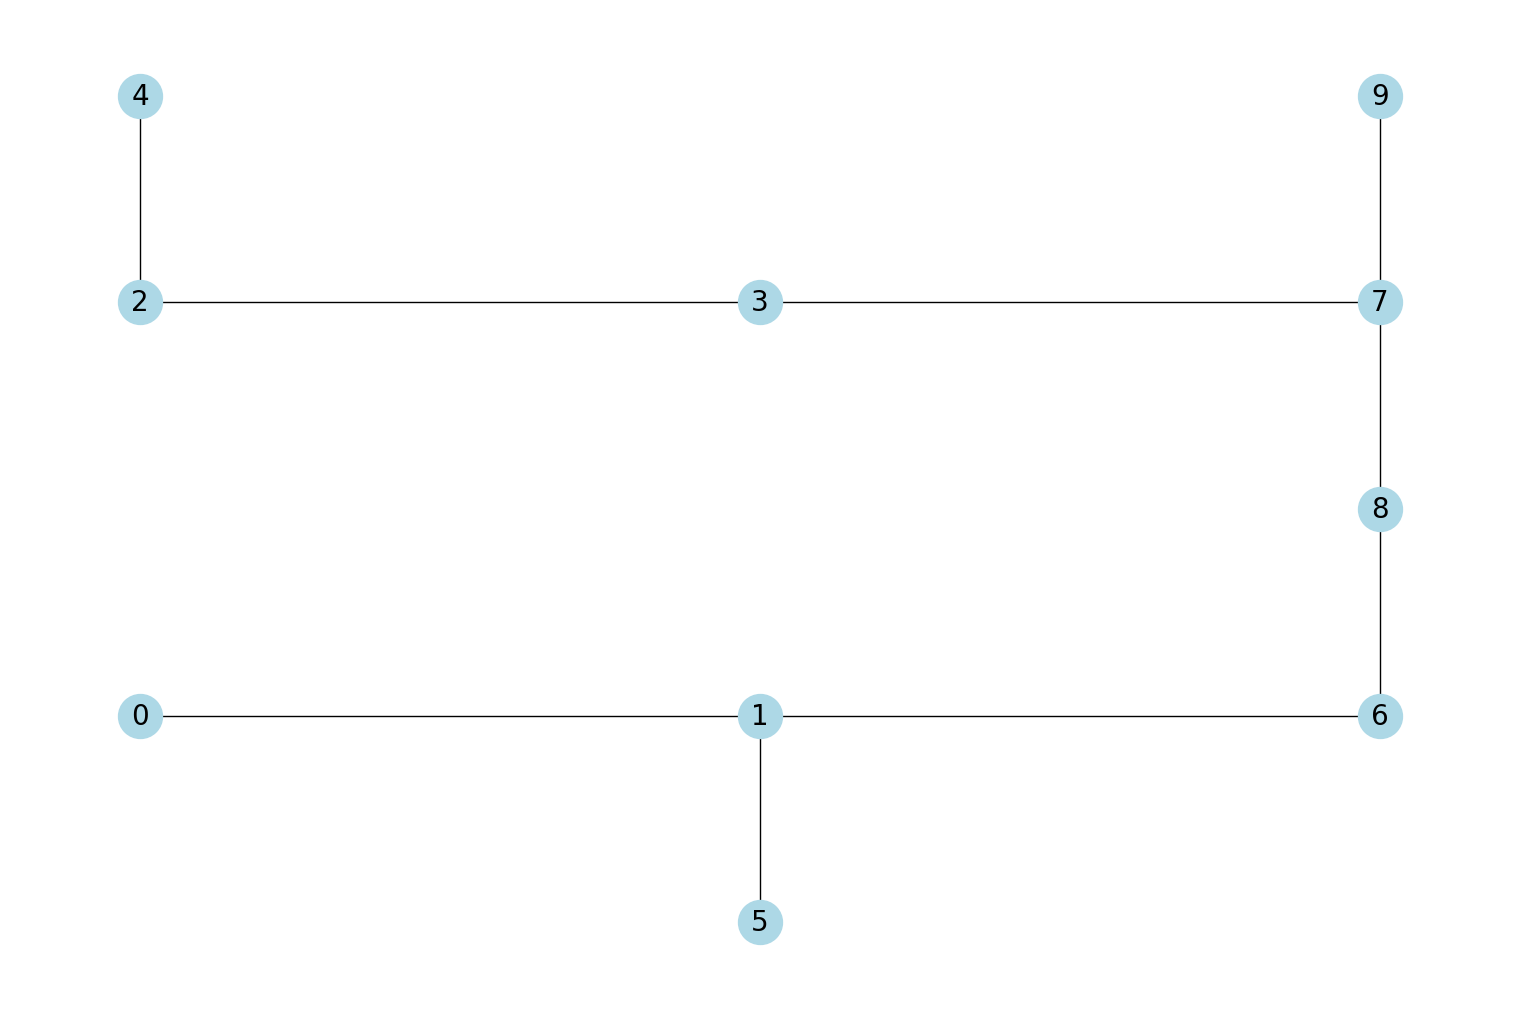

In [14]:
graficar_red(crear_grafo_nx(grafo),20,1000)

Ahora realicemos lo mismo con una red mucho más grande

In [15]:
def leer_datos(path):
    with open(path,"r", encoding = "UTF-8") as archivo:
        matriz = [ i.strip("\n") for i in archivo.readlines()] # i.strip("\n") para quitar los enter en cada linea
        return matriz

In [16]:
matriz = leer_datos("Data/mapa.txt")
Nodo._id = 0
grafo2 = crear_grafo(matriz)
for nodo in grafo2.values():
    print(nodo)

Nodo: (0, 1) Vecinos: [(1, 1)]
Nodo: (1, 1) Vecinos: [(0, 1), (1, 0), (2, 1)]
Nodo: (0, 3) Vecinos: [(1, 3), (0, 4)]
Nodo: (1, 3) Vecinos: [(0, 3), (2, 3)]
Nodo: (0, 4) Vecinos: [(0, 3)]
Nodo: (0, 6) Vecinos: [(1, 6), (0, 7)]
Nodo: (1, 6) Vecinos: [(0, 6), (1, 5), (1, 7)]
Nodo: (0, 7) Vecinos: [(0, 6), (1, 7)]
Nodo: (1, 7) Vecinos: [(0, 7), (1, 6), (2, 7), (1, 8)]
Nodo: (0, 9) Vecinos: [(1, 9)]
Nodo: (1, 9) Vecinos: [(0, 9), (1, 8), (2, 9)]
Nodo: (1, 0) Vecinos: [(1, 1)]
Nodo: (2, 1) Vecinos: [(1, 1), (2, 2)]
Nodo: (2, 3) Vecinos: [(1, 3), (2, 2), (3, 3), (2, 4)]
Nodo: (1, 5) Vecinos: [(2, 5), (1, 6)]
Nodo: (2, 5) Vecinos: [(1, 5), (2, 4), (3, 5)]
Nodo: (2, 7) Vecinos: [(1, 7), (2, 8)]
Nodo: (1, 8) Vecinos: [(1, 7), (2, 8), (1, 9)]
Nodo: (2, 8) Vecinos: [(1, 8), (2, 7), (2, 9)]
Nodo: (2, 9) Vecinos: [(1, 9), (2, 8)]
Nodo: (2, 2) Vecinos: [(2, 1), (3, 2), (2, 3)]
Nodo: (3, 2) Vecinos: [(2, 2), (3, 3)]
Nodo: (3, 3) Vecinos: [(2, 3), (3, 2), (4, 3)]
Nodo: (2, 4) Vecinos: [(2, 3), (2, 5)]


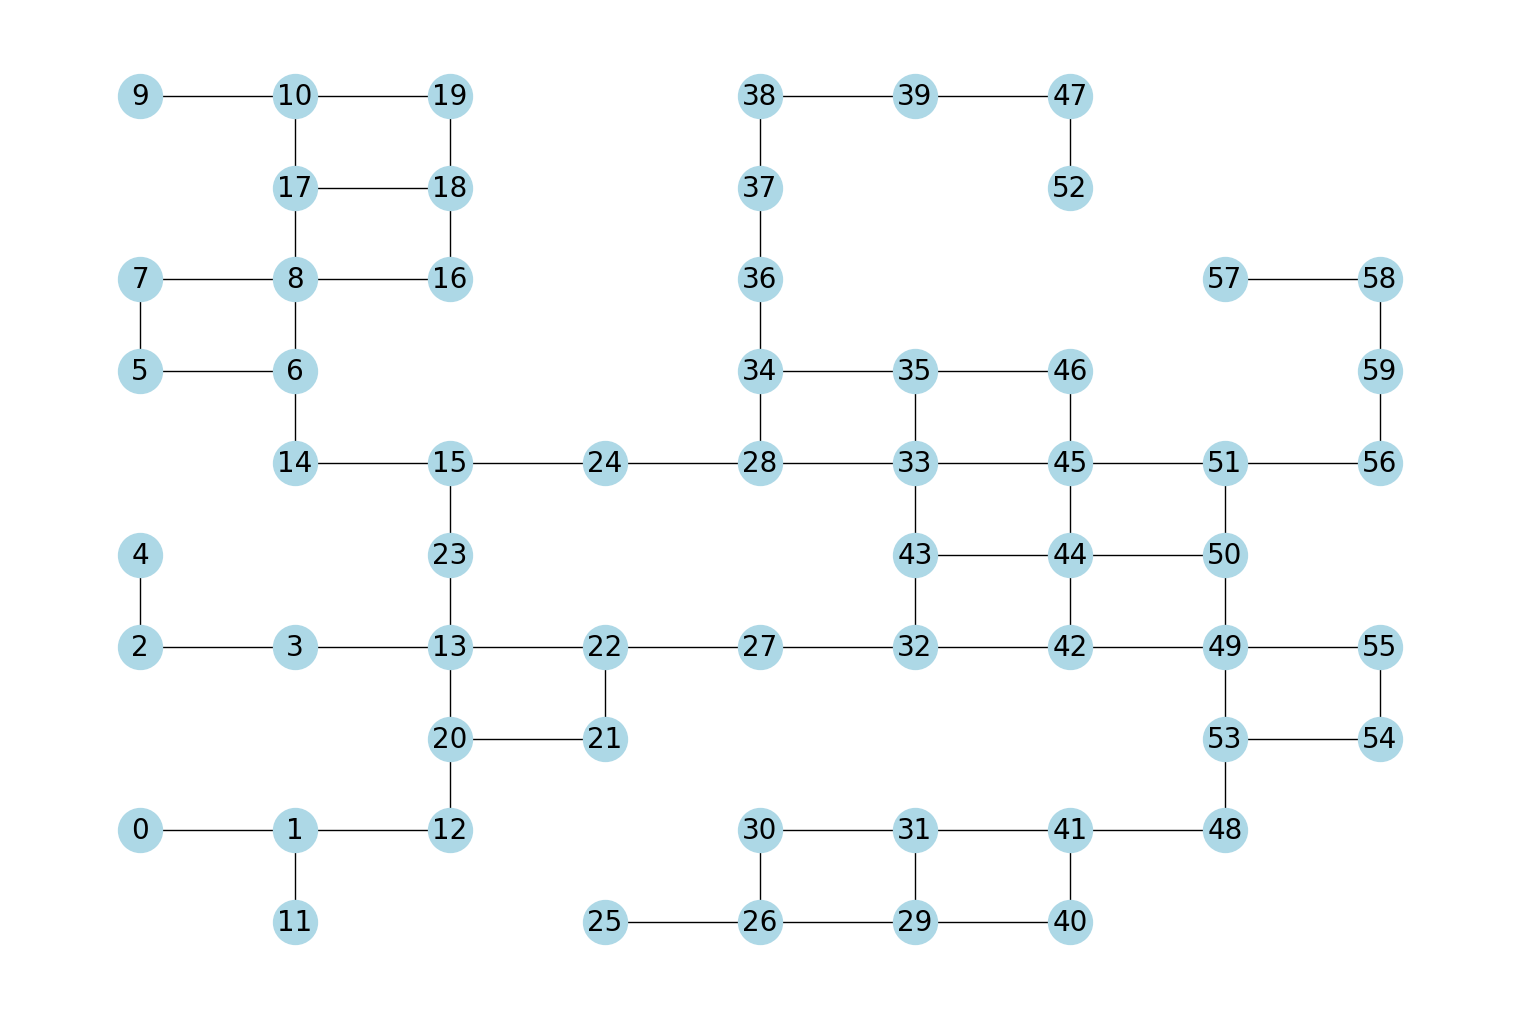

In [17]:
graficar_red(crear_grafo_nx(grafo2),20,1000)

### Algoritmos en redes

Netowork presenta una seríe de algoritmos y problemas de optimización que pueden ser resuletos mediante el uso de librería. Dentro de la documentación pueden revisar muchos de estos algoritmos. Como rutas mínimas, flujo máximo, entre otros. 

### Obteniendo redes reales

Muchas veces lo que necesitamos es obtener la redes de transporte de ciudades, o lugares específicos sin la necesidad de crearlas nosotros mismos. Para eso existe una librería que esta construida con networkX y *Open Street Maps* (OSM) que nos ayuda en la creación y procesamiento de redes de transporte reales. En este caso nos referimos a la librería osmnx. La instalan mediante pip como cualquier librería convencional (es importante que la instalen posterior a GeoPandas). Al igual que con GeoPandas, en Colab basta con ejecutar `!pip install osmnx`.

In [ ]:
%pip install osmnx

In [23]:
# importamos la librería
import osmnx as ox

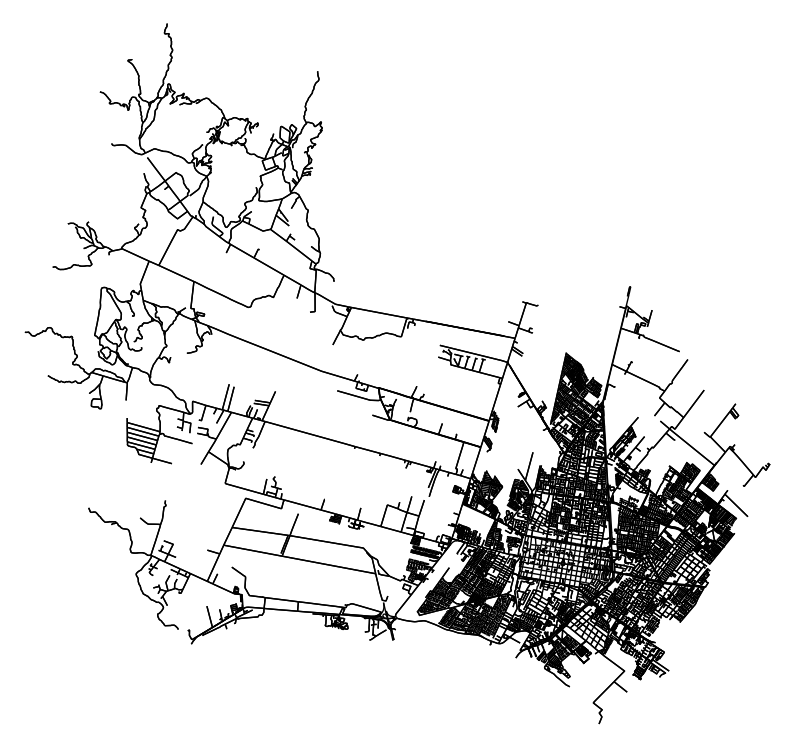

(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot: >)

In [24]:
# Por ejemplo, podemos descargar las redes de alguna ciudad (le pasamos varios parámetros)
ox.plot_graph(ox.graph_from_place('Rancagua, Chile'), figsize = (10,10), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

Las redes de lugares pueden ser obtenidas de varias formas:

- Definiendo los bordes de un rectángulo. (Bounding box)
- Indicando un radio a partir de una coordenada en Lat-Long. 
- Entregando un polygono
- Mediante nombres de lugares (o lista de nombres de lugares)

Además, se pueden especificar diferentes tipos de redes, por ejemplo:

- ‘drive’: Obtiene todas las calles públicas. 
- ‘drive_service’: Obtiene todas las calles públicas, incluyendo vías de servicio. 
- ‘walk’: Obtiene todos los tramos, vias o calles donde pueden transitar peatones.
- ‘bike’: Obtiene todas las vías donde pueden transitar ciclistas.
- ‘all’: Descarga todos los tramos de acceso público.
- ‘all_private’: Descarga todos los tramos de acceso público, incluidas las vías privadas.

#### Descarga desde un bounding box 

Ahora descargaremos una red según un rectángulo y de tipo 'drive'

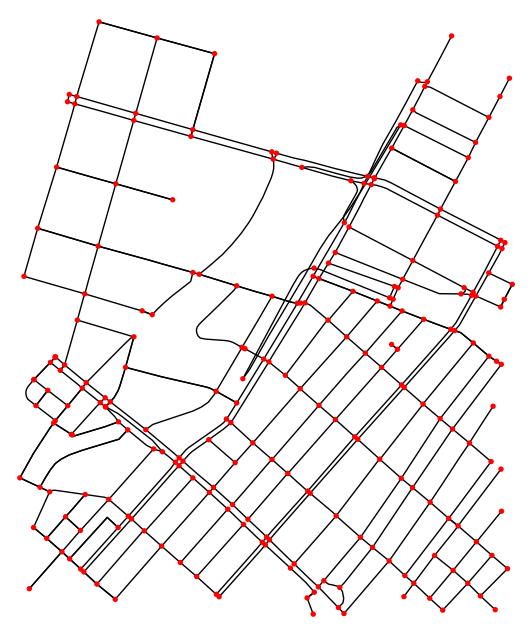

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [30]:
G = ox.graph_from_bbox(35.68, 35.67, 139.76, 139.77, network_type='drive') # estas son coordenadas de alguna parte del mundo, pueden ponerlas en google maps
G_projected = ox.project_graph(G) # Proyectar a UTM
ox.plot_graph(G_projected, bgcolor = 'w', node_color = 'red', edge_color = 'black')

### Ruteo en redes

Dado que osmnx esta escrito con las ventajas de networkx, es posible ejecutar todos los método de netowrkx con las redes que obtengamos de osmnx. Uno de ellos, es la posibilidad de hacer ruteo. Veamos un ejemplo:

In [31]:
# Buscamos dos puntos que generen un recatangulo (coordenadas obtenidos desde Rancagua en Gmaps)
# OSMNX también les permite obtener las coordenadas de direcciónes
p1 = (-34.151351, -70.752434)
p2 = (-34.179492, -70.704044)

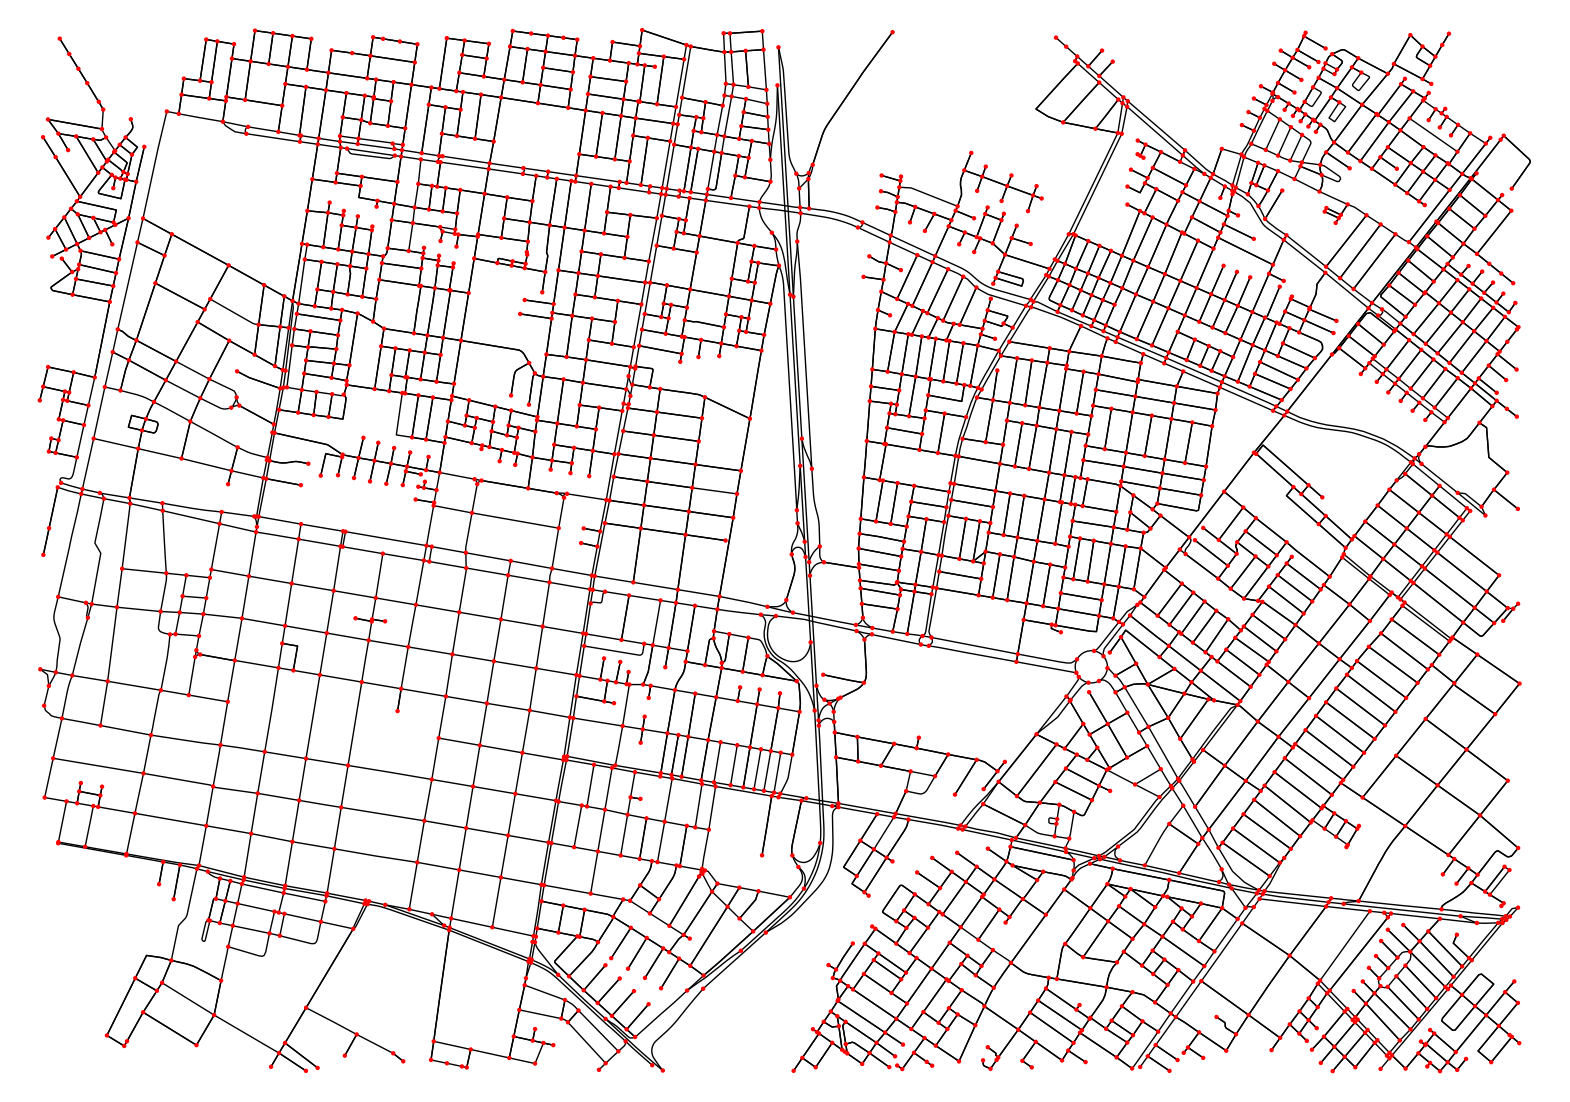

(<Figure size 2000x2000 with 1 Axes>, <AxesSubplot: >)

In [34]:
# Obtenemos la red

net = ox.graph_from_bbox(p1[0], p2[0], p1[1], p2[1], network_type= 'drive')
ox.plot_graph(net, figsize = (20,20), node_size = 10, bgcolor = 'w', node_color = 'red', edge_color = 'black')

In [91]:
# Buscamos un Origen y un destino (ejemplos), pueden ser al azar o buscar el nodo más cercano a dos puntos

# import random as rnd
# orig_node, dest_node = rnd.choices(list(net.nodes()), k=2)

orig_node = ox.distance.nearest_nodes(net, -70.706331, -34.154204)
dest_node = ox.distance.nearest_nodes(net, -70.747979, -34.167679)

net.nodes[orig_node], net.nodes[dest_node]

({'y': -34.1542048, 'x': -70.7063318, 'street_count': 1},
 {'y': -34.1676798, 'x': -70.747979, 'street_count': 3})

In [92]:
route = nx.shortest_path(net, orig_node, dest_node, weight = 'length')
cost = nx.shortest_path_length(net, orig_node, dest_node, weight = 'length')
len(route), cost

(62, 5190.998000000001)

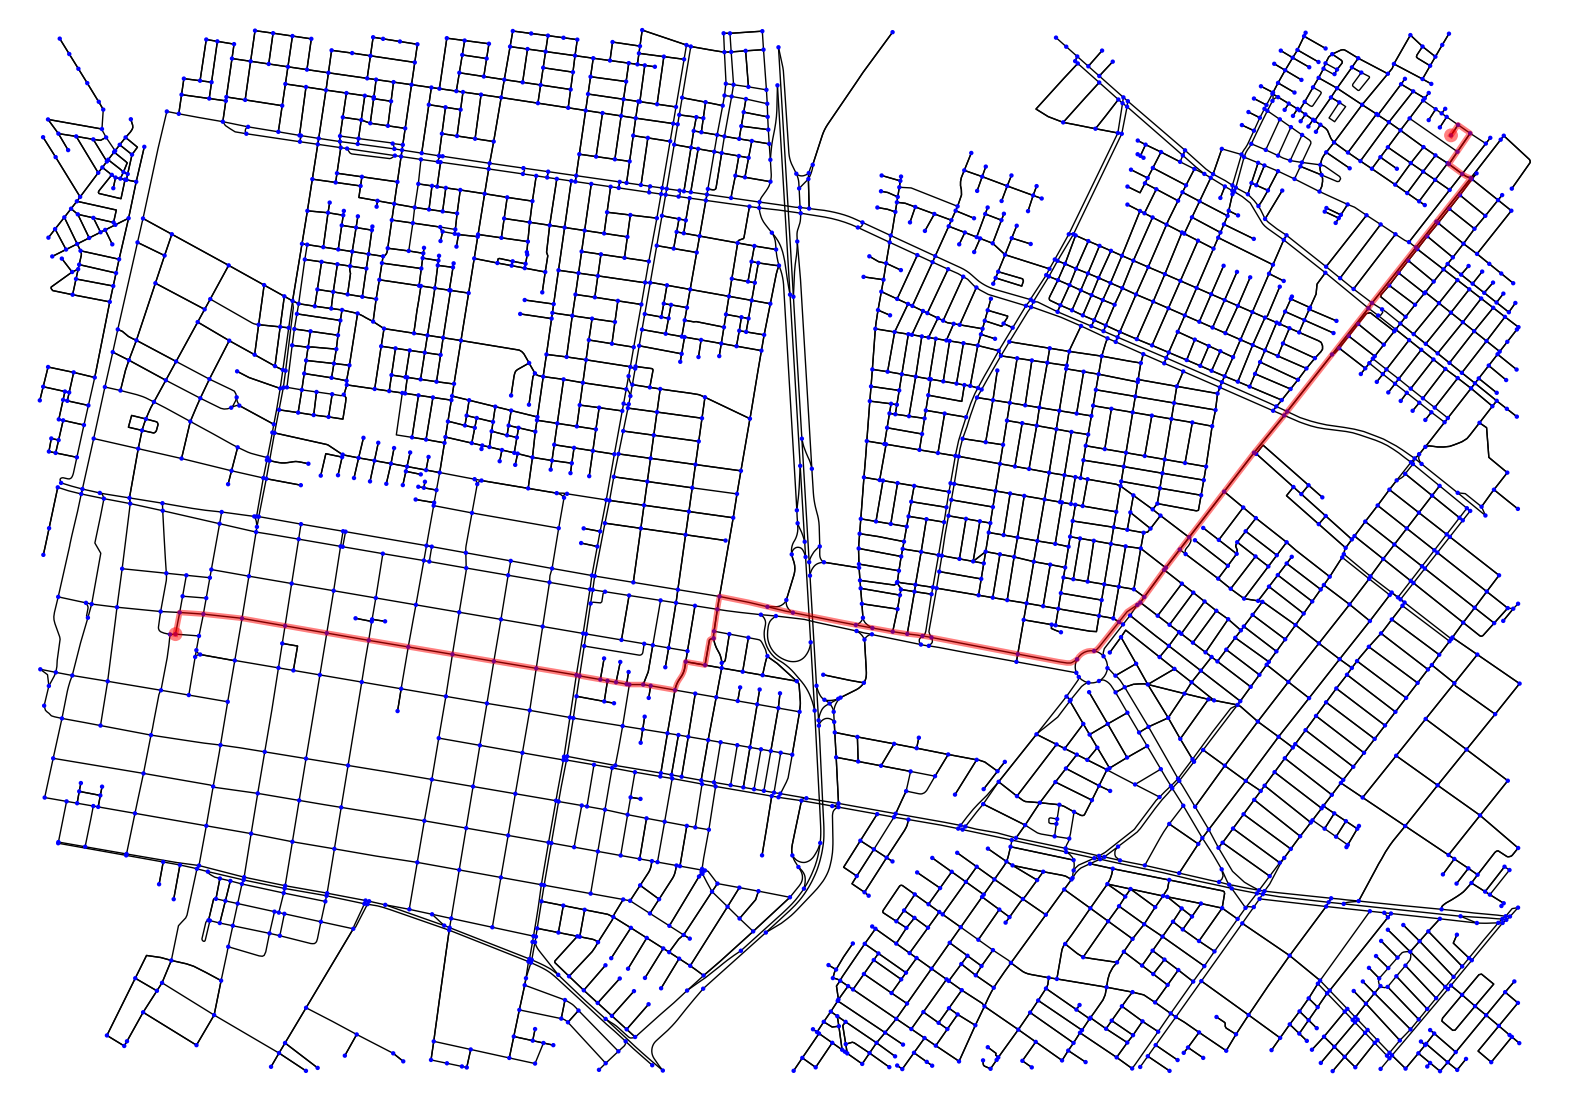

In [93]:
# Realizamos ruteo
fig, ax = ox.plot_graph_route(net, route, route_color='r', node_size = 10, figsize=(20,20), bgcolor = 'w', node_color = 'blue', edge_color = 'black')

### Convertir redes a Shapes (para geopandas)

Podemos guardar nuestras redes como archivos shapes y abrirlas con geopandas.

In [ ]:
ox.save_graph_shapefile(net) # Se guarda dentro de Data/graph_shapefile

In [98]:
import geopandas as gpd

df_nodos = gpd.read_file('Data/graph_shapefile/nodes.shp')
df_arcos = gpd.read_file('Data/graph_shapefile/edges.shp')

<AxesSubplot: >

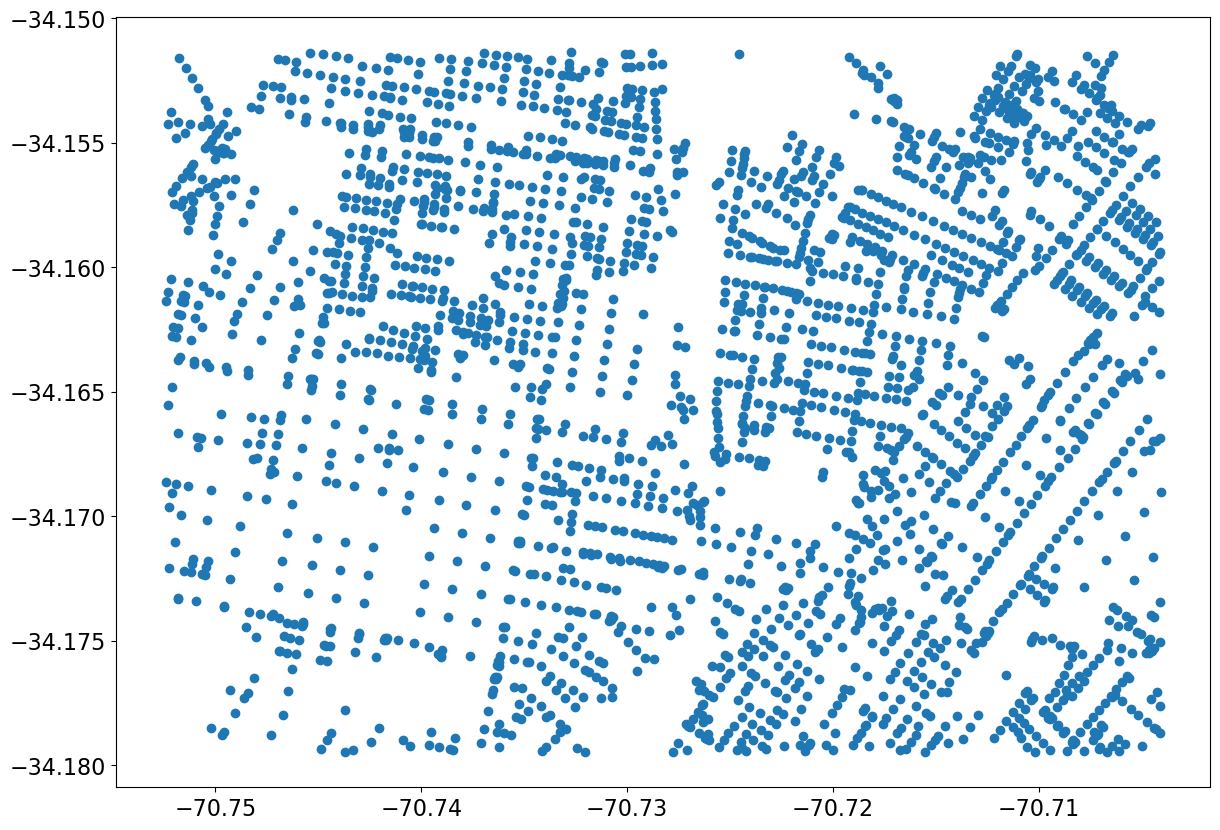

In [99]:
df_nodos.plot()

<AxesSubplot: >

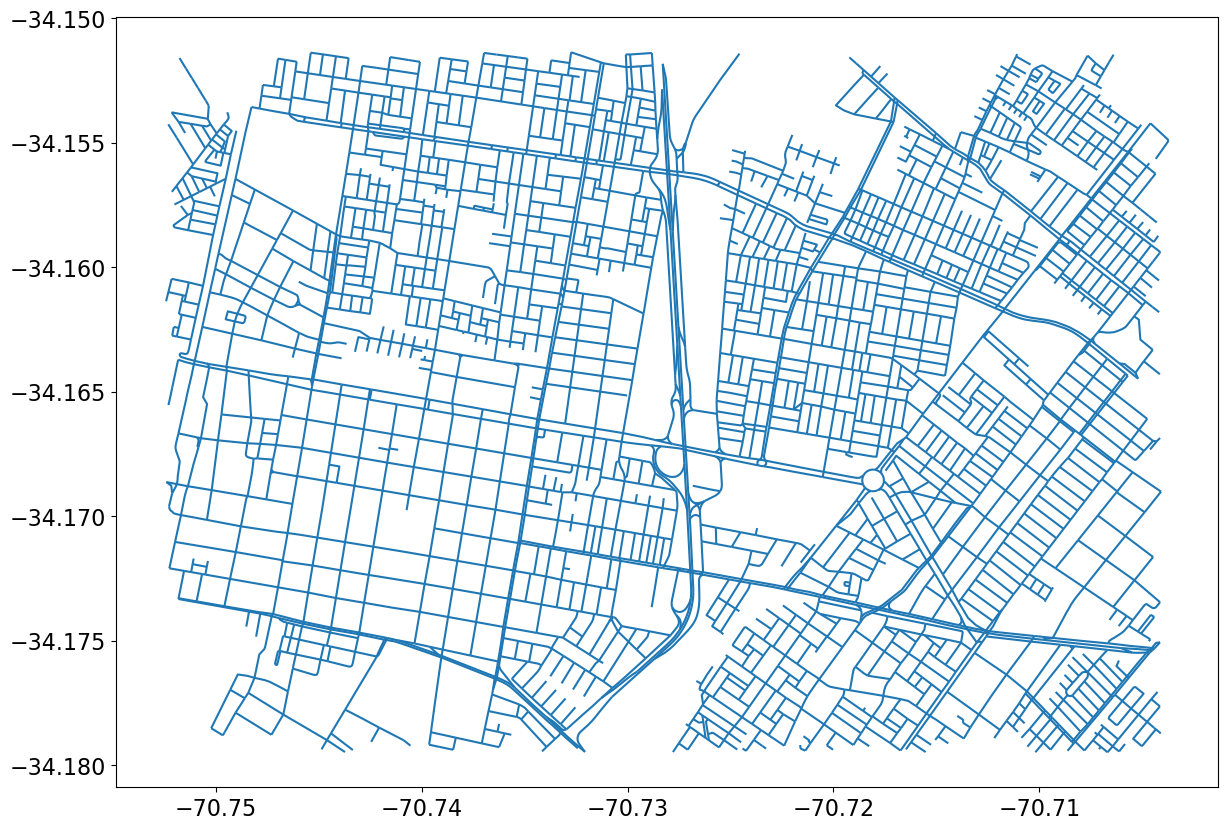

In [100]:
df_arcos.plot()

Ademas podemos consultar la información asociada a los nodos y arcos:

In [101]:
df_nodos.head()

,osmid,y,x,street_cou,highway,geometry
0,314132492,-34.155246,-70.714386,3,None,POINT (-70.71439 -34.15525)
1,314141027,-34.175742,-70.728704,3,motorway_junction,POINT (-70.72870 -34.17574)
2,314141147,-34.173322,-70.726928,3,motorway_junction,POINT (-70.72693 -34.17332)
3,409193153,-34.153560,-70.748261,3,None,POINT (-70.74826 -34.15356)
4,410944297,-34.169779,-70.727602,3,None,POINT (-70.72760 -34.16978)


In [102]:
df_arcos.head()

,u,v,key,osmid,oneway,lanes,name,highway,reversed,length,from,to,maxspeed,bridge,width,access,junction,ref,geometry
0,314132492,1274713247,0,112049446,1,2,Avenida El Sol,secondary,False,22.464,314132492,1274713247,None,None,None,None,None,None,"LINESTRING (-70.71439 -34.15525, -70.71418 -34..."
1,314132492,1274637210,0,112049446,1,2,Avenida El Sol,secondary,False,85.273,1274637210,314132492,None,None,None,None,None,None,"LINESTRING (-70.71509 -34.15475, -70.71467 -34..."
2,314132492,1274713608,0,797759365,1,1,Nueva Litoral,residential,False,33.313,1274713608,314132492,None,None,None,None,None,None,"LINESTRING (-70.71471 -34.15511, -70.71455 -34..."
3,314141027,9445902524,0,"[699295262, 111841925, 139959598, 699295263]",1,2,Ruta Travesía,trunk,False,682.073,314141027,9445902524,80,yes,None,None,None,None,"LINESTRING (-70.72870 -34.17574, -70.72794 -34..."
4,314141027,6933086337,0,735380460,1,1,None,trunk_link,False,468.997,314141027,6933086337,None,None,None,None,None,None,"LINESTRING (-70.72870 -34.17574, -70.72820 -34..."
